In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import nnModels
import main

In [5]:
data = np.load('data/fovealImages.npy')

In [138]:
def splitSectors(np_matrix, objHalf=20, numSectors=[4, 4]):
    sectors = [[] for i in range(16)]
    for layer in np_matrix:
        layer_sect = []
        padShape = np.array(layer.shape)+objHalf*2
        beforeSect = np.ones(padShape, dtype=np.uint8)*255
        size = layer.shape/np.array(numSectors)
        # error will happen if size*num < np_matrix.shape
        # currently not handled or needed
        beforeSect[objHalf:objHalf+layer.shape[0], objHalf:objHalf+layer.shape[1]] = layer
        for i in range(numSectors[0]):
            for j in range(numSectors[1]):
                sectors[i*4+j].append(beforeSect[i*size[0]:(i+1)*size[0]+objHalf*2, j*size[1]:(j+1)*size[1]+objHalf*2])
    return np.array(sectors)

In [125]:
def formRGBImage(np_matrix):
    assert np_matrix.shape[0] == 3 and len(np_matrix.shape) == 3,\
        "shape ({0}) of input matrix does not match (3, M, N)".format(np_matrix.shape)
    return np.stack([np_matrix[0],np_matrix[1],np_matrix[2]],axis=2)

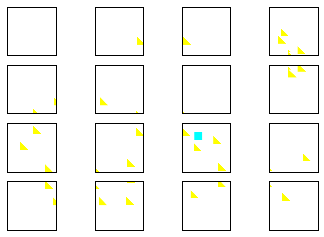

In [147]:
foo = splitSectors(data[0])
for sector_index in range(len(foo)):
    plt.subplot(4,4,sector_index+1)
    bar = formRGBImage(foo[sector_index])
    plt.imshow(bar)
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off
    plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='off',        # ticks along the bottom edge are off
    right='off',       # ticks along the top edge are off
    labelleft='off')   # labels along the bottom edge are off

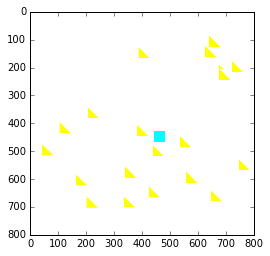

In [142]:
plt.imshow(formRGBImage(data[0]))